# Enemy Survivability 

How long it takes for each weapon to kill an enemy.

## Setting Up

In [1]:
import math
import pandas as pd

%run weapon_full_data.ipynb

## Weapon Damages by Alien Target

In [2]:
weapon_damages_alien_targets = weapon_data_aliens.groupby(["weapon", "target"]).mean()
weapon_damages_alien_targets = weapon_damages_alien_targets[["hits_to_kill"]]
# Weapons unable to damage are removed
weapon_damages_alien_targets = weapon_damages_alien_targets[weapon_damages_alien_targets["hits_to_kill"] != math.inf]
weapon_damages_alien_targets = weapon_damages_alien_targets.sort_values(by=["hits_to_kill"])

## Alien Damage Lists

## Average Damage to Alien

In [3]:
weapon_damages_aliens = weapon_data_aliens.groupby(["weapon", "alien"]).mean()
weapon_damages_aliens = weapon_damages_aliens[["turn_penetrating_damage_expected"]]
weapon_damages_aliens = weapon_damages_aliens.rename(columns={"turn_penetrating_damage_expected": "turn_damage"})
weapon_damages_aliens = weapon_damages_aliens.sort_values(by=["turn_damage"])

Text(0, 0.5, 'Damage')

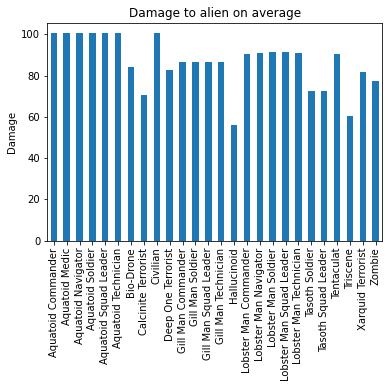

In [4]:
weapon_damages_graph = weapon_damages_aliens.groupby(["alien"]).mean()
ax = weapon_damages_graph.plot.bar(title="Damage to alien on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Damage")

### Hits to Kill

In [5]:
hits_to_kill_average = weapon_data_aliens[["alien", "hits_to_kill"]]
hits_to_kill_average = hits_to_kill_average[hits_to_kill_average["hits_to_kill"] < 200]
hits_to_kill_average = hits_to_kill_average.groupby(["alien"]).mean()
hits_to_kill_average["hits_to_kill"] = hits_to_kill_average.apply(lambda x: math.ceil(x["hits_to_kill"]), axis=1)
hits_to_kill_average = hits_to_kill_average.sort_values(by=["hits_to_kill"])

Text(0, 0.5, 'Hits')

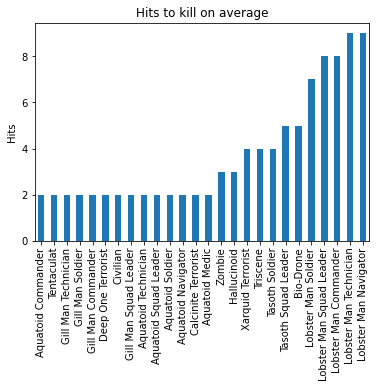

In [6]:
ax = hits_to_kill_average.plot.bar(title="Hits to kill on average", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits")

### Armor

In [7]:
armor_average = weapon_data_aliens[["alien", "armor"]]
armor_average = armor_average.groupby(["alien"]).mean()
armor_average = armor_average.sort_values(by=["armor"])

Text(0, 0.5, 'Armor')

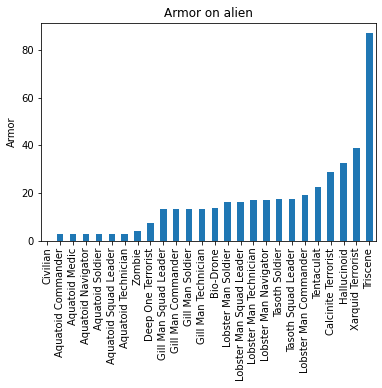

In [8]:
ax = armor_average.plot.bar(title="Armor on alien", legend=False)
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Armor")

## Weapons vs Aliens

### Kinetic Weapons

In [9]:
weapon_damages = weapon_damages_alien_targets.loc[ ["dart_gun", "jet_harpoon", "gas_cannon", "hidro_jet_cannon"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

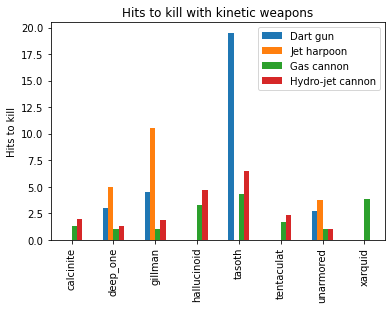

In [10]:
ax = weapon_damages.plot.bar(title="Hits to kill with kinetic weapons")
ax.legend(["Dart gun", "Jet harpoon", "Gas cannon", "Hydro-jet cannon"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Melee

In [11]:
weapon_damages = weapon_damages_alien_targets.loc[ ["thermal_tazer", "vibro_blade", "thermic_lance", "heavy_thermic_lance"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

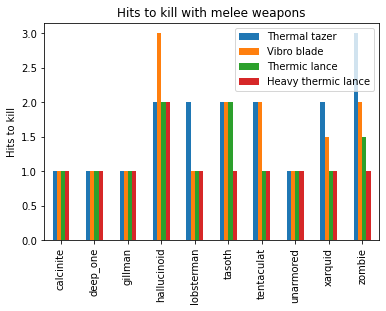

In [12]:
ax = weapon_damages.plot.bar(title="Hits to kill with melee weapons")
ax.legend(["Thermal tazer", "Vibro blade", "Thermic lance", "Heavy thermic lance"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Explosive

In [13]:
weapon_damages = weapon_damages_alien_targets.loc[ ["magna_blast_grenade", "particle_disturbance_grenade", "magna_pack_explosive", "sonic_pulser"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

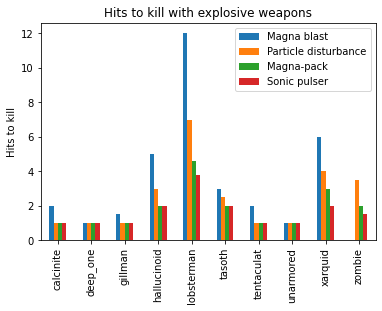

In [14]:
ax = weapon_damages.plot.bar(title="Hits to kill with explosive weapons")
ax.legend(["Magna blast", "Particle disturbance", "Magna-pack", "Sonic pulser"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

In [15]:
weapon_damages = weapon_damages_alien_targets.loc[ ["torpedo_launcher", "disruptor_pulse_launcher", "thermal_shok_launcher"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

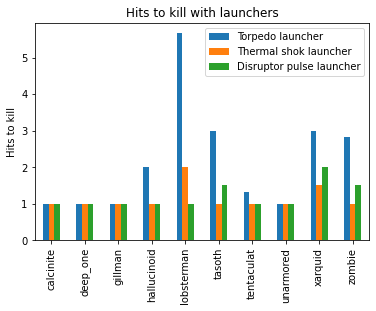

In [16]:
ax = weapon_damages.plot.bar(title="Hits to kill with launchers")
ax.legend(["Torpedo launcher", "Thermal shok launcher", "Disruptor pulse launcher"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Gauss

In [17]:
weapon_damages = weapon_damages_alien_targets.loc[ ["gauss_pistol", "gauss_rifle", "heavy_gauss"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

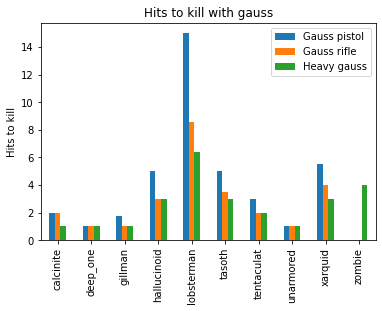

In [18]:
ax = weapon_damages.plot.bar(title="Hits to kill with gauss")
ax.legend(["Gauss pistol", "Gauss rifle", "Heavy gauss"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Sonic

In [19]:
weapon_damages = weapon_damages_alien_targets.loc[ ["sonic_pistol", "sonic_blasta_rifle", "sonic_cannon"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

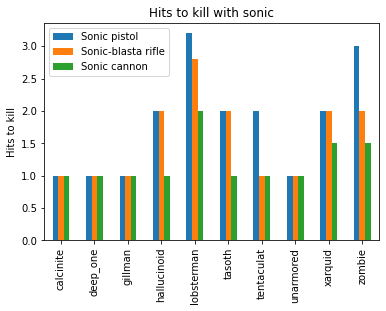

In [20]:
ax = weapon_damages.plot.bar(title="Hits to kill with sonic")
ax.legend(["Sonic pistol", "Sonic-blasta rifle", "Sonic cannon"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")

### Tank

In [21]:
weapon_damages = weapon_damages_alien_targets.loc[ ["aqua_jet_cannon_turret", "gas_cannon_turret", "gauss_cannon_turret", "sonic_cannon_turret", "pwt_cannon_turret"] ]
weapon_damages = weapon_damages.swaplevel().unstack()
weapon_damages = weapon_damages.sort_values(by=["target"])

Text(0, 0.5, 'Hits to kill')

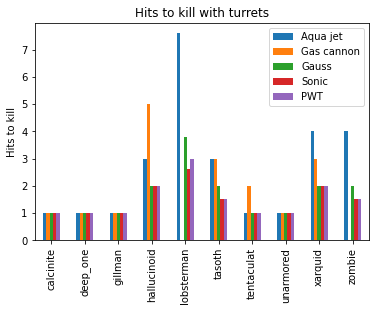

In [22]:
ax = weapon_damages.plot.bar(title="Hits to kill with turrets")
ax.legend(["Aqua jet", "Gas cannon", "Gauss", "Sonic", "PWT"])
ax.xaxis.get_label().set_visible(False)
ax.set_ylabel("Hits to kill")